<a href="https://colab.research.google.com/github/AndrewCrossman/Graduate_Research/blob/main/Chi_Squared_Residuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [1]:
import csv
import numpy as np
import pandas as pd
import scipy as sp
from scipy import optimize
from google.colab import files
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Assign Variables

In [2]:
############################################################
# Assign Input File Names
############################################################
extension_target = "https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Tests/Au50Pd50_Profiles/Dt0/MC_Coreshell5050_AuPd_onAu_r25_2000Cycles/"
extension_model =  "https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Tests/Au50Pd50_Profiles/Dt0/RMC-1-20-25/"
pdf_target = extension_target + "2000.apd"
xrd_target = extension_target + "2000.xrd"
bld11_target = extension_target + "2000_AuAu.bld"
bld12_target = extension_target + "2000_AuPd.bld"
bld22_target = extension_target + "2000_PdPd.bld"
cp_target = extension_target + ""
pdf_model = extension_model + "1-20.apd"
xrd_model = extension_model + "1-20.xrd"
bld11_model = extension_model + "1-20_AuAu.bld"
bld12_model = extension_model + "1-20_AuPd.bld"
bld22_model = extension_model + "1-20_PdPd.bld"
cp_model = extension_model + ""
############################################################
# Assign Output File Names
############################################################
pdf_export = ""
xrd_export = ""
bld11_export = ""
bld12_export = ""
bld22_export = ""
cp_export = ""

# Helper Functions

In [3]:
def read_csv(csv_name,col_names):
  """
  Input csv file name and column names
  Outputs pandas dataframe
  """
  return pd.read_csv(csv_name,sep='\s+', names=col_names, header=None)

In [4]:
def chi_squared_residuals(target,model):
  '''
  Input two arrays two solve for the normalized residuals of
  Outputs the sum of the residuals and the element wise residuals array
  X^2 = SUM{ (target - model)^2 / model }
  '''
  element_wise_residuals = np.divide(np.square(np.subtract(target,model)),target)
  return np.sum(element_wise_residuals), element_wise_residuals

In [5]:
pdf_colnames = ["r","G","idk","idk2"]
pdf_data_target = read_csv(pdf_target, pdf_colnames)
pdf_data_model = read_csv(pdf_model, pdf_colnames)
xrd_colnames = ["2theta", "I"]
xrd_data_target = read_csv(xrd_target, xrd_colnames)
xrd_data_model = read_csv(xrd_model, xrd_colnames)
bld_colnames = ["r","bld"]
bld11_data_target = read_csv(bld11_target, bld_colnames)
bld12_data_target = read_csv(bld12_target, bld_colnames)
bld22_data_target = read_csv(bld22_target, bld_colnames)
bld11_data_model = read_csv(bld11_model, bld_colnames)
bld12_data_model = read_csv(bld12_model, bld_colnames)
bld22_data_model = read_csv(bld22_model, bld_colnames)

# Calculate Chi Squared Residuals

In [17]:
# TEST
a = [1,2,3]
b = [2,2,2]
np.sum(np.divide(np.square(np.subtract(a,b)),a))

1.3333333333333333

## PDF Residuals

In [8]:
pdf_x2, pdf_x2_array = chi_squared_residuals(pdf_data_target["G"],pdf_data_model["G"])
pdf_x2

39.32254710517825

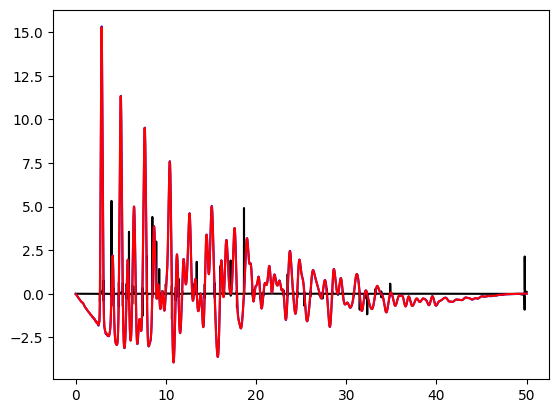

In [21]:
plt.plot(pdf_data_target["r"],pdf_x2_array, 'k')
plt.plot(pdf_data_target["r"],pdf_data_target["G"], 'b')
plt.plot(pdf_data_target["r"],pdf_data_model["G"], 'r')
#plt.xlim(49.7,49.8)
#plt.ylim(-.1,.1)

##XRD Residuals

In [ ]:
xrd_x2, xrd_x2_array = chi_squared_residuals(xrd_target,xrd_model)

NameError: name 'pdf_target' is not defined

## BLD Residuals

In [ ]:
bld11_x2, bld11_x2_array = chi_squared_residuals(bld11_target,bld11_model)
bld12_x2, bld12_x2_array = chi_squared_residuals(bld12_target,bld12_model)
bld22_x2, bld22_x2_array = chi_squared_residuals(bld22_target,bld22_model)

NameError: name 'xrd_target' is not defined

## Composition Profile Residuals

In [ ]:
cp_x2, cp_x2_array = chi_squared_residuals(cp_target,cp_model)